In [ ]:
pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 14.0 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import timm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DATASET_PATH = Path ('/content/drive/MyDrive/dataset2-tiff')

Mounted at /content/drive


In [ ]:
def create_vit_model(pretrained=True):
    # Get ViT from timm，use 'vit_base_patch32_224' as a pretrain model
    model = timm.create_model('vit_base_patch32_224', pretrained=pretrained, num_classes=50)
    
    #num_classes = 10 
    #model.head = nn.Linear(model.classifier.in_features, num_classes)
    
    return model

In [ ]:
# Build the datablock
datablock = DataBlock(
    get_items = get_image_files,
    get_y = parent_label,
    blocks = (ImageBlock, CategoryBlock),
    splitter = GrandparentSplitter(valid_name = 'test'), #splitter
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

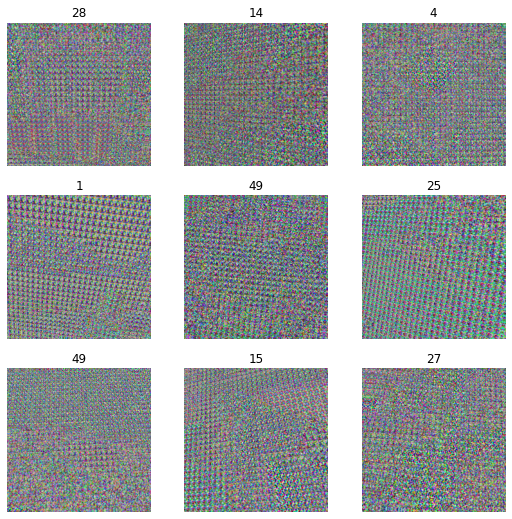

In [ ]:
dls = datablock.dataloaders(DATASET_PATH)
dls.show_batch()

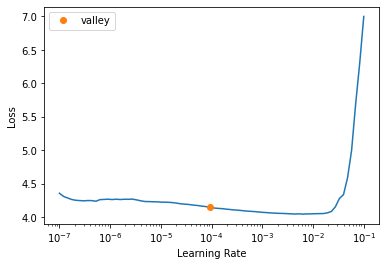

In [ ]:
vit_model = create_vit_model()
learn = Learner(dls, vit_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
# find the best learning rate
lr_rate = learn.lr_find()

In [ ]:
# Train the model
learn.fit_one_cycle(20, lr_rate)

epoch,train_loss,valid_loss,accuracy,time
0,3.004950,3.213225,0.170400,1:08:43
1,2.475635,2.753235,0.282400,02:29
2,2.080296,2.271568,0.404000,02:29
3,1.797791,2.011354,0.452000,02:29
4,1.615219,1.771008,0.516800,02:29
5,1.398581,1.628703,0.559600,02:29
6,1.244390,1.631211,0.570000,02:29
7,1.042565,1.514307,0.588000,02:30
8,0.914236,1.568697,0.597600,02:30
9,0.709181,1.595385,0.601200,02:29


KeyboardInterrupt: ignored

In [ ]:
# model evaluations 
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.recorder.summary()

In [ ]:
# export the model
learn.export('/content/drive/MyDrive/Model/data2_ViT32_tiff.pkl')